[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Loading dataset...
Memory Usage: 3.57 GB / 12.67 GB (30.6%)
Memory Usage: 3.77 GB / 12.67 GB (32.2%)
Dataset shape after loading: (3066200, 6)
Cleaning sentiment column...
Invalid sentiment rows: 3
Sample invalid sentiments: ['tomorrow before i go to the dentist  so u can update me on ur 1st day back lol', "e to do Beachbody full-time.    www.thefitcpa.com  Click on 'Be A Coach' and join me.", 'we look for tickets?  try aegean they cheap. But will need TENT too hahah"']
Cleaning id column...
Invalid id rows: 24
Sample invalid ids: ['19573........ By Billy Joel                  A-Mill named MVG of the ECSUHL', '17933741698:37 PDT 2009', '182315534RY', '1933 u like someone but theirs things in the way? reply wi answers!', '19573UERY']
Removing duplicates...
Text-based duplicates: 2928510
Dataset shape after preprocessing: (1598347, 6)
Memory Usage: 3.70 GB / 12.67 GB (31.6%)
Feature extraction completed.
Memory Usage: 3.59 GB / 12.67 GB (30.8%)
Number of users with >= 10 tweets: 21832
Me

https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
https://github.com/hmmlearn/hmmlearn/iss

Memory Usage: 3.58 GB / 12.67 GB (30.7%)


Streaming output truncated to the last 5000 lines.
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/

HMM training completed.
Memory Usage: 3.58 GB / 12.67 GB (30.8%)


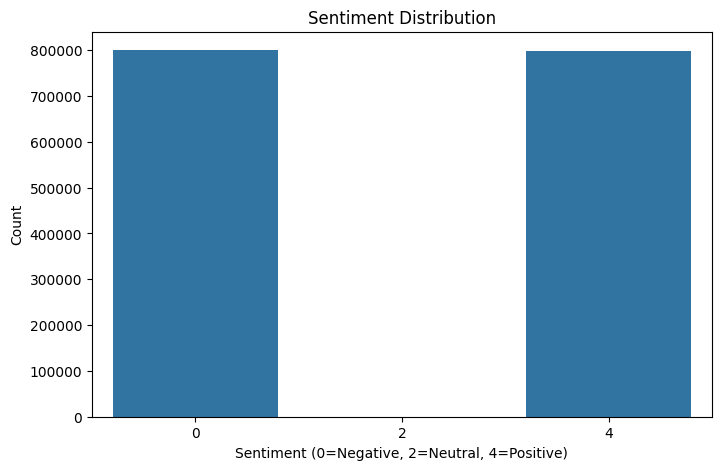

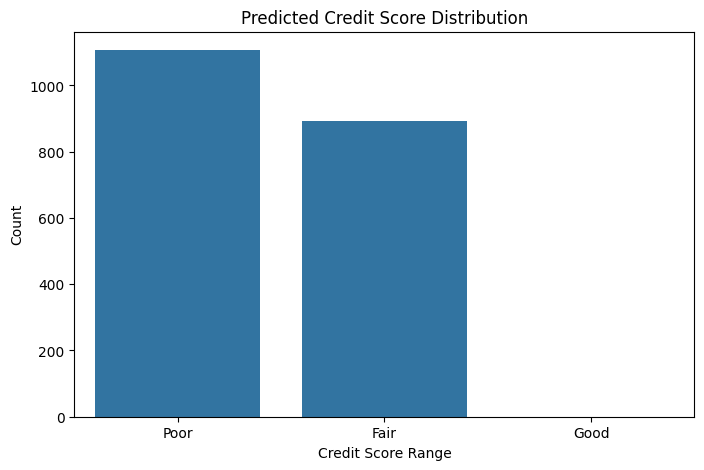

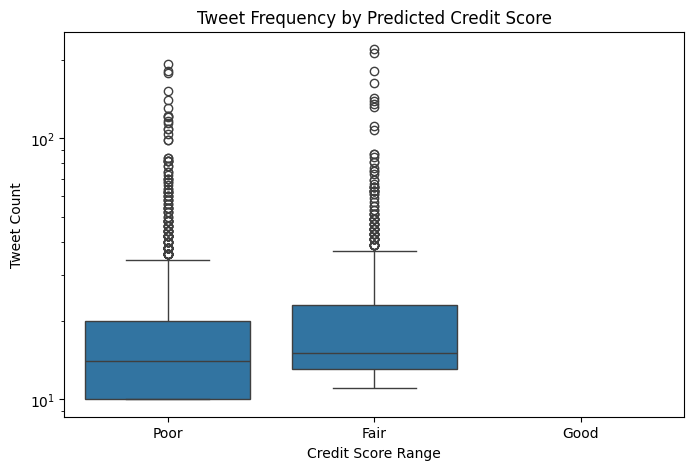

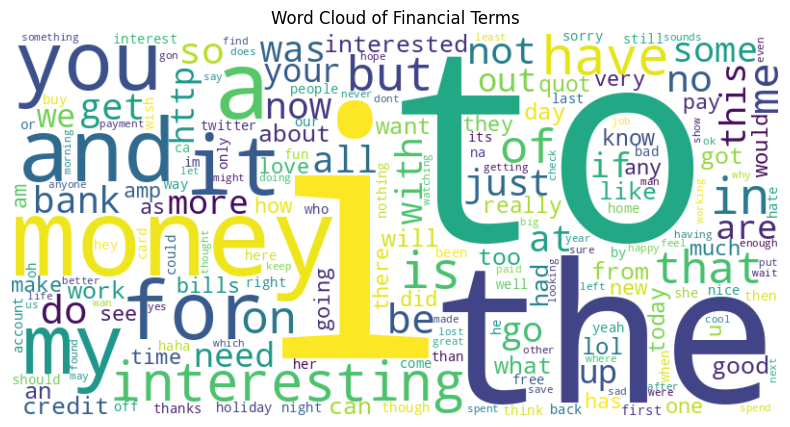


Sentiment Distribution:
sentiment
0    800006
2         0
4    798341
Name: count, dtype: int64

Tweet Frequency Statistics:
count    21832.000000
mean        19.677583
std         17.124855
min         10.000000
25%         11.000000
50%         14.000000
75%         21.000000
max        549.000000
Name: tweet_count, dtype: float64

Financial Intent Counts:
financial_intent
False    1581963
True       16384
Name: count, dtype: int64

Top Financial Words:
[('money', 409)]

Correlation between Tweet Count and Financial Intent: 0.188

Sentiment vs. Predicted Credit Score Crosstab:
predicted_credit_label   Fair   Poor
sentiment                           
0                        8335   9044
4                       10708  12824


In [9]:
# Install required packages
!pip install hmmlearn nltk pandas numpy matplotlib seaborn wordcloud

# Import necessary libraries
import pandas as pd
import numpy as np
from hmmlearn import hmm
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import psutil
import csv
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Download NLTK data
nltk.download('punkt')
nltk.download('punkt_tab')

# Function to check memory usage
def check_memory():
    mem = psutil.virtual_memory()
    used = mem.used / (1024 ** 3)  # Convert to GB
    total = mem.total / (1024 ** 3)
    print(f"Memory Usage: {used:.2f} GB / {total:.2f} GB ({mem.percent}%)")
    return used, total

# Step 1: Load the dataset (436 MB CSV)
# Instructions:
# 1. Upload 'sentiment140.csv' to Colab via the left sidebar (Files -> Upload).
# 2. Ensure only one copy of the file is uploaded to avoid duplicates.
print("Loading dataset...")
check_memory()
df = pd.read_csv('sentiment140.csv', encoding='latin-1',
                 names=['sentiment', 'id', 'date', 'query', 'user', 'text'],
                 engine='python', quoting=csv.QUOTE_ALL, on_bad_lines='skip',
                 dtype={'user': 'str', 'text': 'str'})
check_memory()
print(f"Dataset shape after loading: {df.shape}")

# Step 2: Preprocess the dataset
# Clean sentiment column: Convert to numeric, keep only 0, 2, 4
print("Cleaning sentiment column...")
invalid_sentiments = df[~df['sentiment'].astype(str).str.replace('.', '', 1).str.isnumeric()]
print(f"Invalid sentiment rows: {len(invalid_sentiments)}")
if len(invalid_sentiments) > 0:
    print("Sample invalid sentiments:", invalid_sentiments['sentiment'].head().tolist())
df['sentiment'] = pd.to_numeric(df['sentiment'], errors='coerce')
df = df[df['sentiment'].isin([0, 2, 4])]
df['sentiment'] = df['sentiment'].astype('int32')

# Clean id column: Convert to numeric, keep only valid integers
print("Cleaning id column...")
invalid_ids = df[~df['id'].astype(str).str.replace('.', '', 1).str.isnumeric()]
print(f"Invalid id rows: {len(invalid_ids)}")
if len(invalid_ids) > 0:
    print("Sample invalid ids:", invalid_ids['id'].head().tolist())
df['id'] = pd.to_numeric(df['id'], errors='coerce')
df = df[df['id'].notna()]
df['id'] = df['id'].astype('int64')

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')
# Remove duplicates based on id and text
print("Removing duplicates...")
text_duplicates = df[df.duplicated(subset=['text'], keep=False)]
print(f"Text-based duplicates: {len(text_duplicates)}")
df = df.drop_duplicates(subset=['id', 'text'])
print(f"Dataset shape after preprocessing: {df.shape}")
check_memory()

# Step 3: Feature Extraction
# Define financial keywords for intent analysis
financial_keywords = ['debt', 'loan', 'credit', 'bills', 'mortgage', 'bank',
                      'finance', 'money', 'payment', 'taxes', 'savings', 'interest']
def has_financial_intent(text):
    text = str(text).lower()
    return any(keyword in text for keyword in financial_keywords)

# Add financial intent column
df['financial_intent'] = df['text'].apply(has_financial_intent)
# Tokenize tweets for word frequency (sample to save memory)
df_sample = df.sample(n=min(100000, len(df)), random_state=42)
df_sample['tokens'] = df_sample['text'].apply(lambda x: [t for t in word_tokenize(str(x).lower()) if t.isalpha()])
print("Feature extraction completed.")
check_memory()

# Step 4: Aggregate tweets by user
# Group by user, create sentiment sequences, tweet counts, and financial intent counts
user_data = df.groupby('user').agg({
    'sentiment': list,
    'date': list,
    'text': list,
    'financial_intent': 'sum',
    'id': 'count'
}).reset_index()
user_data.rename(columns={'id': 'tweet_count'}, inplace=True)
# Filter users with at least 10 tweets
user_data = user_data[user_data['tweet_count'] >= 10]
print(f"Number of users with >= 10 tweets: {len(user_data)}")
check_memory()

# Step 5: Simulate Credit Scores
# Define credit score ranges: 0=Poor, 1=Fair, 2=Good
sentiment_to_credit = {
    0: [0.3, 0.3, 0.4],  # Increased "Good" probability
    2: [0.2, 0.3, 0.5],  # Neutral (though absent)
    4: [0.1, 0.2, 0.7]   # Increased "Good" probability
}
def simulate_credit_sequence(sentiments):
    return [np.random.choice([0, 1, 2], p=sentiment_to_credit[s]) for s in sentiments]

user_data['simulated_credit'] = user_data['sentiment'].apply(simulate_credit_sequence)
check_memory()

# Step 6: HMM Training
# Train HMM on a larger subset of users to capture more variability
np.random.seed(42)
sample_users = user_data.sample(n=min(2000, len(user_data)), random_state=42)
credit_predictions = []

for idx, row in sample_users.iterrows():
    if len(row['sentiment']) < 10:  # Skip users with insufficient tweets
        credit_predictions.append(np.nan)
        continue
    observations = np.array([[s] for s in row['sentiment']])
    model = hmm.MultinomialHMM(n_components=3, n_iter=100, random_state=42)
    try:
        model.fit(observations)
        predicted_states = model.predict(observations)
        # Bias toward "Good" if transition to "Good" is high
        last_state = predicted_states[-1]
        trans_prob = model.transmat_[last_state, 2]  # Probability to "Good" from current state
        if trans_prob > 0.5 and last_state != 2:
            credit_predictions.append(2)  # Force "Good"
        else:
            credit_predictions.append(last_state)
    except:
        credit_predictions.append(np.nan)  # Handle convergence failures

sample_users['predicted_credit'] = credit_predictions
# Map states to labels
state_labels = {0: 'Poor', 1: 'Fair', 2: 'Good'}
sample_users['predicted_credit_label'] = sample_users['predicted_credit'].map(state_labels)
print("HMM training completed.")
check_memory()

# Step 7: Relationship and Frequency Analysis
# Sentiment distribution
sentiment_counts = df['sentiment'].value_counts().reindex([0, 2, 4], fill_value=0)
# Tweet frequency by user
tweet_freq = user_data['tweet_count'].describe()
# Financial intent frequency
financial_intent_counts = df['financial_intent'].value_counts()
# Word frequency for financial tweets
financial_tweets = df_sample[df_sample['financial_intent']]['tokens'].explode()
word_freq = Counter(financial_tweets)
common_financial_words = [(word, freq) for word, freq in word_freq.most_common(10) if word in financial_keywords]

# Step 8: Visualizations
# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment (0=Negative, 2=Neutral, 4=Positive)')
plt.ylabel('Count')
plt.show()

# Plot predicted credit score distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=sample_users, x='predicted_credit_label', order=['Poor', 'Fair', 'Good'])
plt.title('Predicted Credit Score Distribution')
plt.xlabel('Credit Score Range')
plt.ylabel('Count')
plt.show()

# Plot tweet frequency vs. predicted credit score
plt.figure(figsize=(8, 5))
sns.boxplot(data=sample_users, x='predicted_credit_label', y='tweet_count',
            order=['Poor', 'Fair', 'Good'])
plt.title('Tweet Frequency by Predicted Credit Score')
plt.xlabel('Credit Score Range')
plt.ylabel('Tweet Count')
plt.yscale('log')
plt.show()

# Word cloud for financial terms
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(
    dict(word_freq))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Financial Terms')
plt.show()

# Print analysis results
print("\nSentiment Distribution:")
print(sentiment_counts)
print("\nTweet Frequency Statistics:")
print(tweet_freq)
print("\nFinancial Intent Counts:")
print(financial_intent_counts)
print("\nTop Financial Words:")
print(common_financial_words)

# Step 9: Entity Relationships
# Correlation between tweet count and financial intent
correlation = user_data[['tweet_count', 'financial_intent']].corr().iloc[0, 1]
print(f"\nCorrelation between Tweet Count and Financial Intent: {correlation:.3f}")

# Sentiment vs. predicted credit score
sentiment_credit = sample_users.explode('sentiment')[['sentiment', 'predicted_credit_label']]
crosstab = pd.crosstab(sentiment_credit['sentiment'], sentiment_credit['predicted_credit_label'])
print("\nSentiment vs. Predicted Credit Score Crosstab:")
print(crosstab)